## Artifitial Inteligence Project NO.2
### Mohammad Mahdi Ebrahim Soltani
#### studetn id: 810100241

in this computer assignment we are going to use the ``hidden markov model`` to evalute the probabilty of som audios that are defined by their speakers and the digit each speaker is pronouncing. we will see how the `HMM` will predict each data of our dataset and learn and find out the accuaracy of each guess and prediction of said data. 
the datas are stored in a folder, with 6 speakers pronouncing numbers 0 to 9 fifty times.

the librarys used are as follows:

In [30]:
import numpy as np
import glob
import os
from scipy.io import wavfile
from scipy.stats import multivariate_normal
from hmmlearn import hmm
from python_speech_features import mfcc as MFCC
import matplotlib.pyplot as plt
import librosa

In [31]:
min_audio_frames = 12
audio_speakers = ['george', 'jackson', 'lucas', 'nicolas', 'theo', 'yweweler']
dataset_keys = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
recordings_path = './recordings/*.wav'

## Part 1: preprocessing and feature extraction
here we have the `get_audio` function wich removes the silence from the voices in the proccess of reading the audios.

In [32]:
def get_audios(recordings):
    audios = []
    sampling_rate = None
    for audio_file in recordings:
        audio, sampling_rate = librosa.load(audio_file, sr=None)
        audio, _ = librosa.effects.trim(audio, top_db=50, frame_length=1024)
        audios.append(audio) 
    return audios, sampling_rate

then in the `calc_mfccs` function, we need to make mfccs length the same size, we give a certain max frame number and cut those that are above it adn padd those that are below it

In [33]:
def calc_mfccs(audios, sample_rate):
    mfccs = []
    max_frames = 33
    for audio in audios:
        mfcc = MFCC(audio, samplerate=sample_rate, nfft=1024, numcep=12, winlen=0.05)
        if len(mfcc) < max_frames:
            mfcc_padded = np.pad(mfcc, ((0, max_frames - len(mfcc)), (0, 0)), mode='edge')
            mfccs.append(mfcc_padded)
        else:
            mfcc_truncated = mfcc[:max_frames, :]
            mfccs.append(mfcc_truncated)
        
    return mfccs

def plot_mfcc(recordings, mfccs_list):
    print(len(recordings))
    person = np.random.randint(0, len(recordings))
    num, name, index = recordings[person].split('\\')[-1].split('.')[0].split('_')
    plt.matshow(mfccs_list[int(index)].T, cmap='Spectral', origin='lower', aspect='auto')
    plt.title(f" digit {num} from {name} | Mfcc heatmap")
    plt.ylabel('MFCC Coefficients')
    plt.xlabel('Time')
    plt.colorbar()
    plt.show()

## preprocess questions
### Question 1:
1. for the datas that we are working with, segmentation is not crucial. the datas are 6 speakers saying digits 50 times so the datas have little variability and the fact that these audios are short and continoues lets us keep it that way and not segment it.
### Question 2:
1. ##### Mel-Spectogram: 
    A mel-spectrogram is a visual representation of the spectrum of frequencies in an audio signal as they vary over time, with the frequency scale adjusted to match the human ear’s perception of pitch. It combines the time-based analysis of a spectrogram with the mel scale, which is more linear at lower frequencies and logarithmic at higher frequencies.
2. ##### Zero Crossing Rate (ZCR):
    The zero-crossing rate (ZCR) is a measure of the number of times an audio signal crosses the zero amplitude axis, reflecting the frequency content of the signal. It’s commonly used in audio processing to distinguish between voiced and unvoiced speech and to detect percussive sounds.
3. ##### MFCC (Mel-Frequency Cepstral Coefficients):
    Mel-Frequency Cepstral Coefficients (MFCCs) are a set of features that represent the short-term power spectrum of a sound, commonly used in speech and audio processing to capture the timbral characteristics of an audio signal. They are derived from a type of cepstral representation of the audio clip, which is a spectrum-of-a-spectrum, on a nonlinear mel scale that closely approximates the human auditory system’s response.
4. ##### Chroma Features:
    Chroma features, also known as chromagrams or pitch class profiles, are a powerful tool in audio signal processing that summarize a sound’s harmonic content by mapping frequencies to 12 distinct pitch classes based on the Western music scale. They capture the essence of harmony and melody in music while being robust to changes in timbre and instrumentation.

relations between the features are:
##### MCFF and Mel-Spectogram: 
Mel-Frequency Cepstral Coefficients (MFCCs) condense the audio signal’s spectral features into a brief set of values. They originate from the Mel-Spectrogram, which depicts the signal’s time-frequency details. By applying the Discrete Cosine Transform (DCT) to the logarithmic energies of the filter banks, MFCCs efficiently summarize the audio’s spectral data.
##### ZCR and MFCCs:
Zero Crossing Rate (ZCR) sheds light on the rhythm and flow of an audio signal over time, whereas Mel-Frequency Cepstral Coefficients (MFCCs) distill the essence of its frequency spectrum. Employed in tandem, these metrics offer a multifaceted profile of an audio signal, encapsulating both its beat and tonal blueprint.
##### Chroma Features and MFCCs:
Chroma features concentrate on the melodic elements and harmonies within an audio track, whereas Mel-Frequency Cepstral Coefficients (MFCCs) encapsulate the broader spectral traits. Together, these attributes offer a holistic view of a track’s musical qualities, proving beneficial for identifying music genres and detecting chords.

3000
300


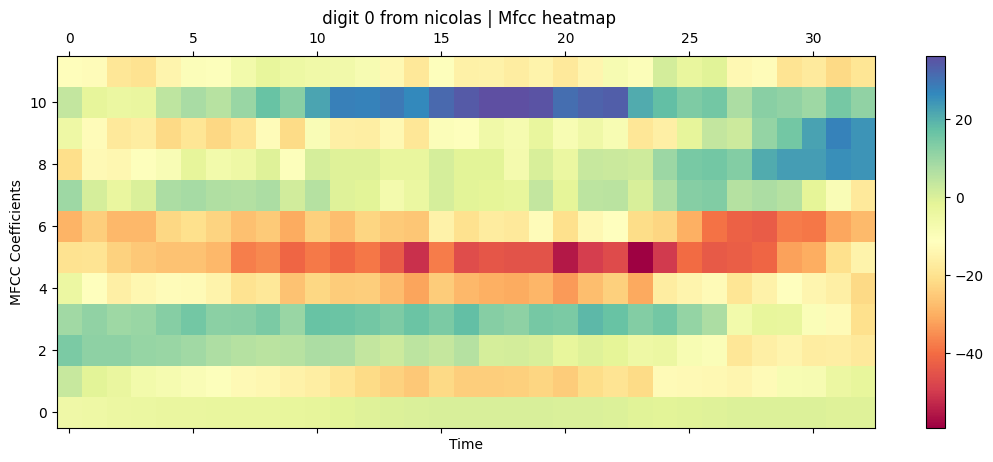

300


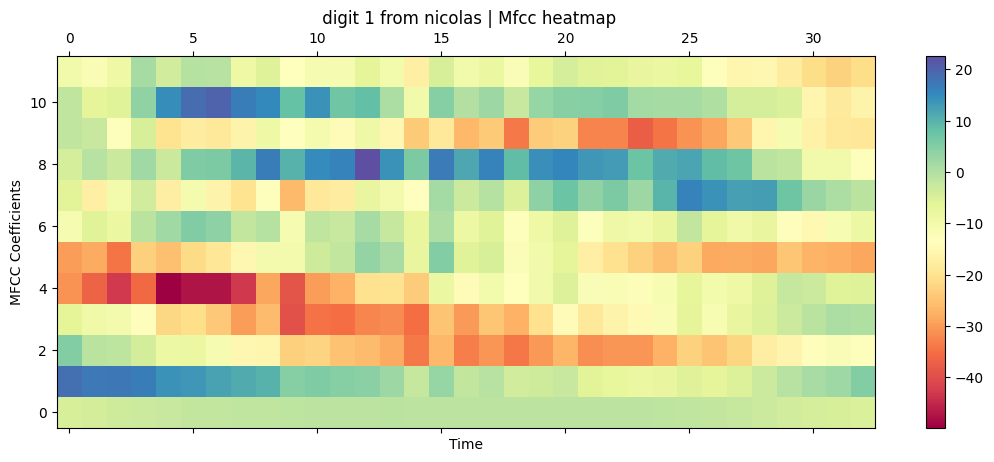

300


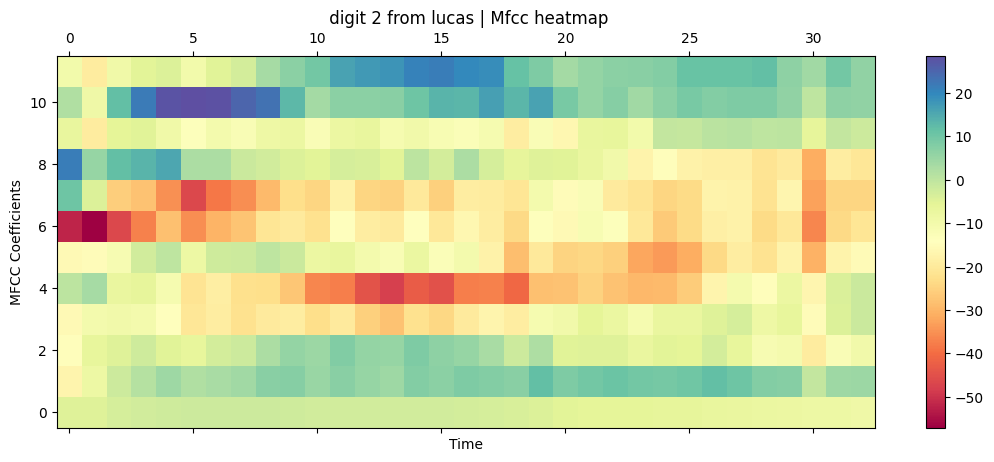

300


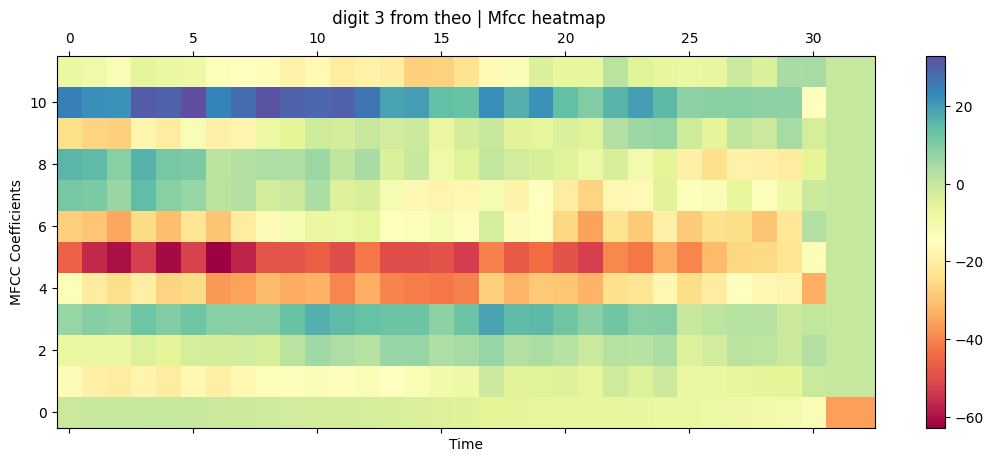

300


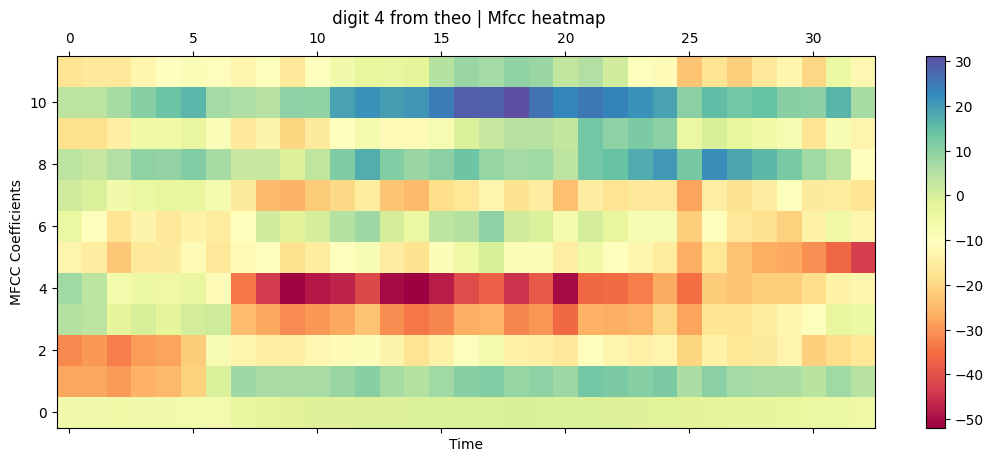

300


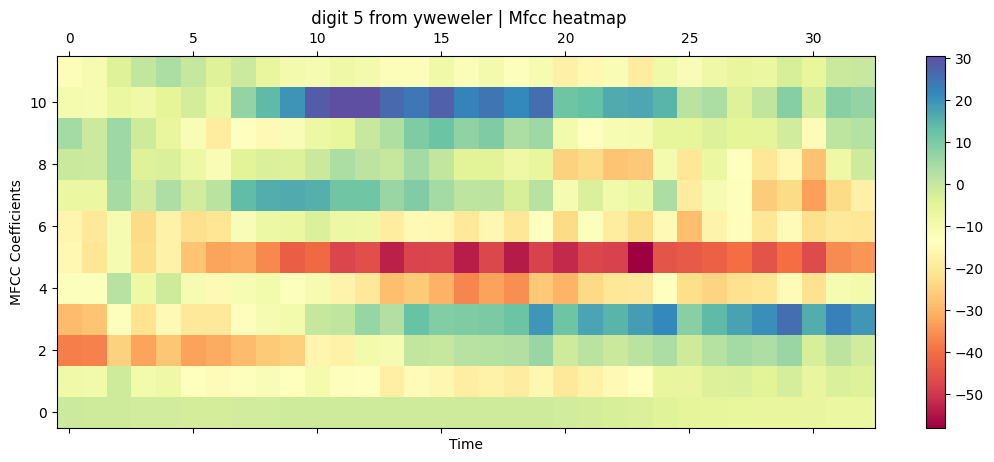

300


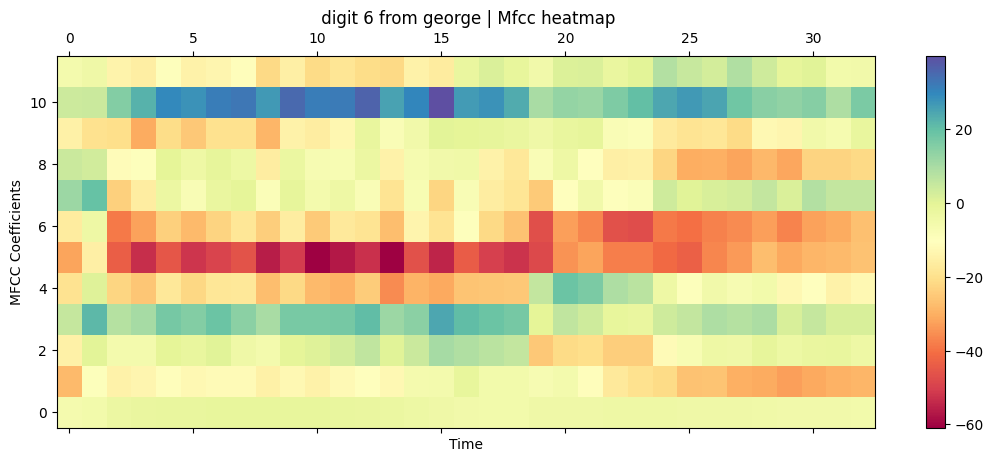

300


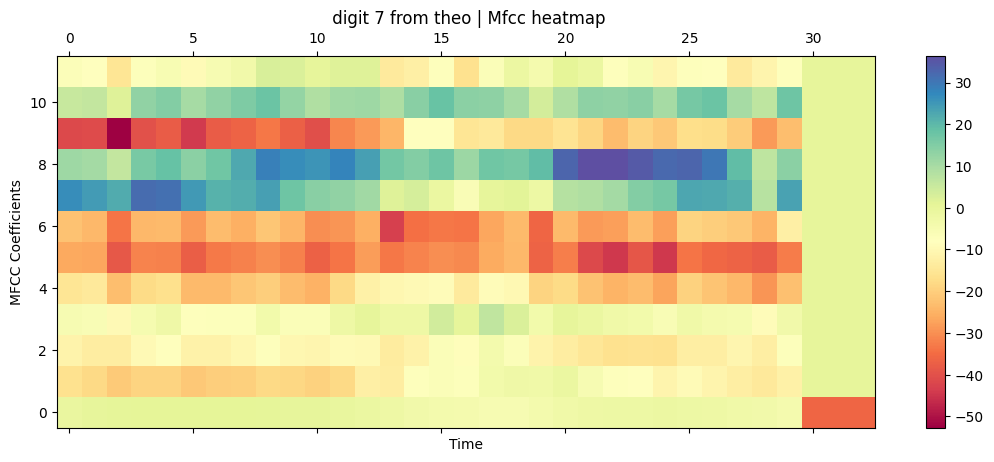

300


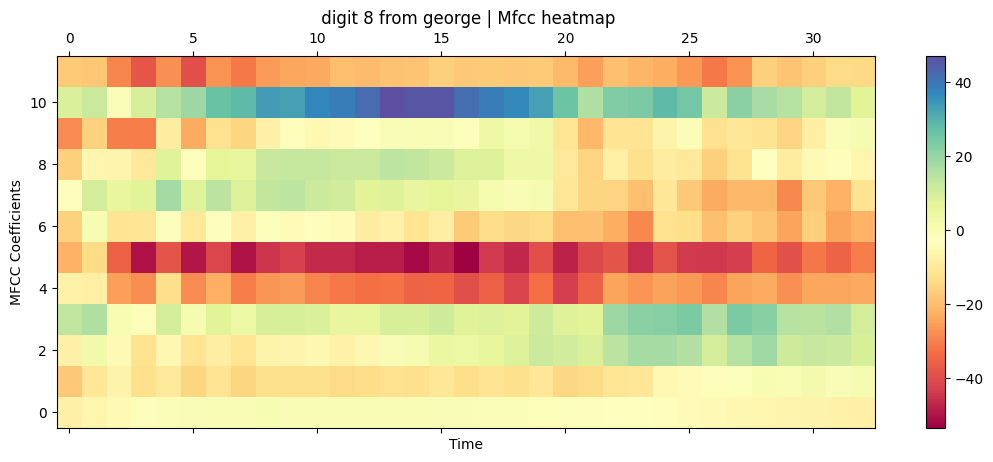

300


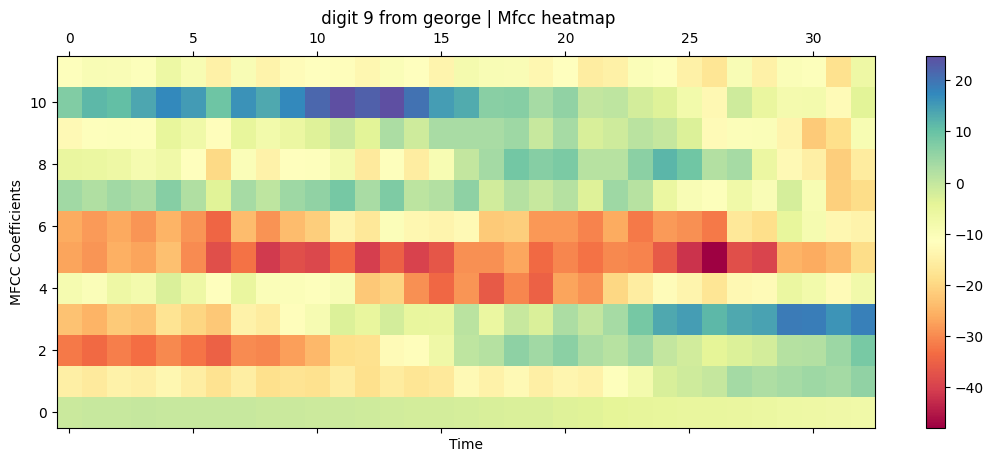

In [34]:
all_recordings = glob.glob(recordings_path)
all_features_digit = []
total_nums_digit = []
print(len(all_recordings))
for i in range(10):
    digit_recordings = []
    for recording in all_recordings:
        if recording.startswith(f"./recordings\\{i}_"):
            digit_recordings.append(recording)
    audios, sampling_rate = get_audios(digit_recordings)
    mfccs = calc_mfccs(audios, sampling_rate)
    plot_mfcc(digit_recordings, mfccs)
    all_features_digit.append(mfccs)
    total_nums_digit.append([i] * len(mfccs))

all_features_speaker = []
total_nums_speaker = []
for i in range(6):
    speaker_recordings = []
    for recording in all_recordings:
        if audio_speakers[i] in recording:
            speaker_recordings.append(recording)
    audios, sampling_rate = get_audios(speaker_recordings)
    mfccs = calc_mfccs(audios, sampling_rate)
    all_features_speaker.append(mfccs)
    total_nums_speaker.append([i] * len(mfccs))

### Question 3:
### Robustness and Sensitivity of MFCC Features

#### Noise Robustness
MFCCs exhibit resilience against ambient noise and various disturbances. This robustness stems from their logarithmic spectral derivation, which highlights key spectral elements and diminishes minor ones.

#### Temporal Robustness
Capturing both fleeting and enduring spectral details, MFCCs are well-suited for signals with time-based fluctuations. Their resilience to minor changes in duration and alignment aids in tasks that involve ongoing vocal or musical sequences.

#### Frequency Sensitivity
The frequency alterations in audio signals, especially within pivotal perceptual regions, are precisely detected by MFCCs. They adeptly track shifts in pitch and timbre, crucial for discerning the distinct qualities of sound sources.

#### Parameter Sensitivity
The performance of MFCCs is contingent on parameter selection, including the count of filterbanks, window size, and cepstral coefficients. Optimal tuning of these parameters is essential for superior performance across diverse sound types and applications.

### Qustion 4:
in these cases MFCCs are less effective:
#### Handling Non-Stationary Signals
MFCCs presuppose that audio signals are quasi-stationary within brief frames. Yet, for signals with swift changes or non-stationary elements, like quick pitch shifts or ephemeral noises, MFCCs might not fully grasp the dynamic spectral nuances.

#### Impact of Nonlinear Distortions
The MFCC generation process is grounded in linear methods such as the DFT and DCT. When signals are subject to nonlinear distortions — think clipping, saturation, or compression effects — MFCCs might not truly reflect the altered spectral landscape.

#### Frequency Resolution Constraints
The human ear's frequency perception is approximated using a set Mel filterbank count in MFCCs. In situations demanding granular frequency detail or significant high-frequency elements — for instance, differentiating close phonemes or pinpointing musical instruments — the constrained frequency resolution of MFCCs could hinder performance.

### Question 5:
Utilizing intersecting frames during the extraction of MFCCs is advantageous as it allows for a more consistent and smooth capture of the audio signal’s temporal fluctuations, which is essential for a wide range of tasks in audio analysis.

### Question 6:
The early coefficients in MFCC analysis often contain the most vital information about an audio’s spectral form and energy profile. By limiting the analysis to a smaller number of frames, one can decrease the complexity of the features, which is beneficial for reducing computational demands. Focusing on the initial 12 or 13 MFCCs is effective for gathering the most perceptually important data, as studies show that these lower-order coefficients are more closely aligned with human auditory sensitivity, thus ensuring efficient and meaningful feature extraction.

## Part 2: Implementing with Libraries


## HMM Introduction

### Question 1:
#### States
In the realm of HMM, 'states' are the concealed variables that transition over time, each mirroring a specific scenario or state of the system. These transitions are probabilistic, and the number of states is a hyperparameter that defines the model's intricacy, without necessarily holding intrinsic meaning.

#### Observations
'Observations' refer to the tangible data or readings linked to each state, representing what can be directly measured or perceived.

#### Application in Digit or Speaker Classification
Within digit or speaker classification tasks using HMM, states could symbolize various vocal or tonal attributes, or even accents, while observations might be the extracted audio features, like MFCC coefficients, serving as the project's focal data points. 

### Question 2:
A first-order Hidden Markov Model (HMM) operates under the assumption that the likelihood of moving to a given state is influenced solely by the present state, disregarding the history of prior states. On the other hand, higher-order HMMs take into account both the present and preceding states to calculate transition probabilities, allowing them to reflect more intricate state sequence relationships.

### Question 3:
Hidden Markov Models (HMMs) are statistical frameworks ideal for examining and constructing models of processes that unfold in sequences, with unobservable states influencing the sequences. They excel in handling data that occurs in a series, such as events or temporal data, adeptly mapping out the connections within these sequences to provide insights into their evolution. some examples of hmm's applications are ```Natural Language Processing```, ```Speech Recognition``` and ```Bioinformatics```.

### Question 4:
#### Advantages
- **Sequence Modeling**: HMMs excel in representing sequences through hidden states, making them ideal for sequential observation modeling.
- **Handling Incomplete Data**: They adeptly manage gaps in data by leveraging the probabilities of observed emissions.
- **Learnable Parameters**: Transition and emission probabilities within HMMs can be deduced from data, utilizing algorithms like Expectation-Maximization.
- **Uncertainty Modeling**: The probabilistic nature of HMMs allows for effective modeling of data uncertainties, beneficial in unpredictable scenarios.

#### Disadvantages
- **Markov Property Assumption**: HMMs rely on the assumption that future states are solely determined by the current state, which may not always align with real-world complexities.
- **Scalability Challenges**: Increasing the number of states and parameters can complicate the model, posing scalability issues with larger datasets.
- **Initial Condition Sensitivity**: The initial parameter settings can significantly affect HMMs, as their convergence to the optimal solution is dependent on these starting estimates.

### Question 5:
- **Left-Right HMM**
This HMM variant arranges states sequentially, permitting transitions exclusively in a forward direction. It's a favored choice for modeling time-sequential data like spoken words.

- **Continuous HMM**
Optimal for scenarios where state emissions are continuous values. Continuous HMMs are prevalent in fields like speech processing and motion recognition.

- **Mixture HMM**
A composite model that merges several HMMs, each symbolizing a distinct operational mode of the system, enabling the model to toggle between these modes.

- **Factorial HMM**
Enhances the model by incorporating factorial dependencies within the emission probabilities, which allows for complex interactions among observation vector components.

In [35]:
from sklearn.model_selection import train_test_split


def make_dataset(data, labels, components):
    DS_train = {}
    data_test_x = []
    data_test_y = []

    for i in range(len(components)):
        x_train, x_test, y_train, y_test = train_test_split(np.array(data[i]), np.array(labels[i]), 
                                                            test_size=0.2, random_state=42)
        DS_train[i] = x_train.reshape((-1, x_train.shape[2]))
        data_test_x.extend(x_test)
        data_test_y.extend(y_test)

    data_test_x = np.array(data_test_x)
    data_test_y = np.array(data_test_y)

    return DS_train, data_test_x, data_test_y

def learning_with_hmm_library(DS_train, components, num_states):
    hmm_models = []
    for i in range(len(components)):
        model = hmm.GaussianHMM(n_components=num_states, covariance_type='tied')
        model.fit(DS_train[i])
        hmm_models.append(model)

    return hmm_models

Digit Model Using Library Metrics:
	Accuracy: 0.9383
	Precision: 0.9391


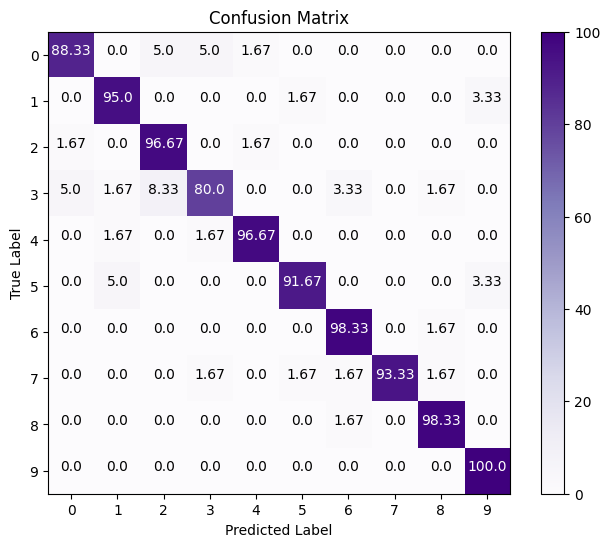

In [36]:
def calc_predictions(models, x_test):
    scores_list = []
    for test_sample in x_test:
        temp_scores = [model.score(test_sample) for model in models]
        scores_list.append(temp_scores)
        
    scores_array = np.array(scores_list)
    predictions = np.argmax(scores_array, axis=1)
    return predictions.tolist()

def calc_accuracy(y_test, y_pred):
    total_samples = len(y_test)
    correct_predictions = sum(1 for true_label, pred_label in zip(y_test, y_pred) if true_label == pred_label)
    accuracy = correct_predictions / total_samples

    return accuracy

def calc_precision(y_test, y_pred, num_classes):
    precision_per_class = [0] * num_classes

    for true_label in range(num_classes):
        true_positives = sum(1 for true, pred in zip(y_test, y_pred) if true == true_label and pred == true_label)
        total_predicted = sum(1 for pred in y_pred if pred == true_label)

        if total_predicted == 0:
            precision_per_class[true_label] = 0
        else:
            precision_per_class[true_label] = true_positives / total_predicted

    precision = sum(precision_per_class) / len(precision_per_class)

    return precision

def calc_confusion_matrix(true_labels, predicted_labels, num_classes):
    confusion_matrix = [[0] * num_classes for _ in range(num_classes)]
    class_totals = [sum(1 for label in true_labels if label == i) for i in range(num_classes)]

    for true_label, pred_label in zip(true_labels, predicted_labels):
        confusion_matrix[true_label][pred_label] += 1

    for i in range(num_classes):
        for j in range(num_classes):
            percentage = (confusion_matrix[i][j] / class_totals[i]) * 100 if class_totals[i] != 0 else 0
            confusion_matrix[i][j] = round(percentage, 2)

    return confusion_matrix

def plot_confusion_matrix(confusion_matrix, labels):
    num_classes = len(confusion_matrix)
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Purples)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, str(confusion_matrix[i][j]), horizontalalignment="center", color="white" if confusion_matrix[i][j] > (0.5 * confusion_matrix[i][i]) else "black")
    plt.show()

def calc_metrics(y_test, y_pred, components, name, comment=""):
    print(f"{name} Model {comment} Metrics:")
    print(f"\tAccuracy: {calc_accuracy(y_test, np.array(y_pred)):.4f}")
    print(f"\tPrecision: {calc_precision(y_test, np.array(y_pred), len(components)):.4f}")

DS_train, data_test_x, data_test_y = make_dataset(all_features_digit, total_nums_digit, dataset_keys)
digit_models = learning_with_hmm_library(DS_train, dataset_keys, 15)

preds = calc_predictions(digit_models, data_test_x)
accuracy = calc_accuracy(data_test_y, preds)
precision = calc_precision(data_test_y, preds, len(dataset_keys))

conf_matrix = calc_confusion_matrix(data_test_y, preds, len(dataset_keys))

calc_metrics(data_test_y, preds, dataset_keys, "Digit", "Using Library")
plot_confusion_matrix(conf_matrix, range(0, 10))

Speaker Model Using Library Metrics:
	Accuracy: 0.9750
	Precision: 0.9760


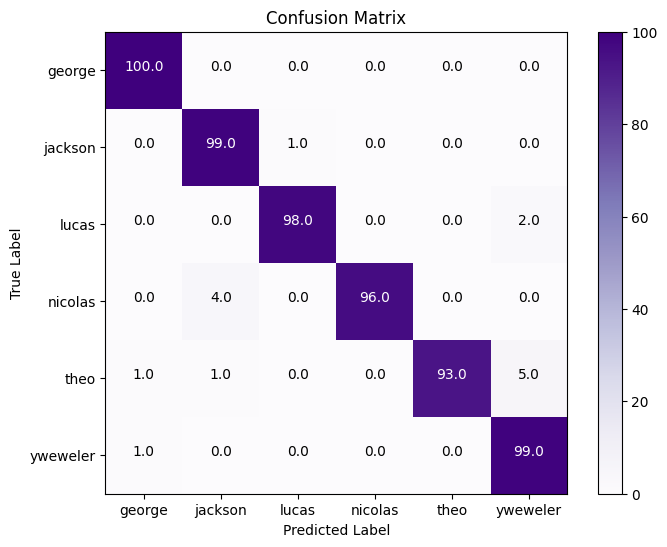

In [37]:
DS_train, data_test_x, data_test_y = make_dataset(all_features_speaker, total_nums_speaker, audio_speakers)
person_models = learning_with_hmm_library(DS_train, audio_speakers, 12)

preds = calc_predictions(person_models, data_test_x)
accuracy = calc_accuracy(data_test_y, preds)
precision = calc_precision(data_test_y, preds, len(audio_speakers))

conf_matrix = calc_confusion_matrix(data_test_y, preds, len(audio_speakers))

calc_metrics(data_test_y, preds, audio_speakers, "Speaker", "Using Library")
plot_confusion_matrix(conf_matrix, audio_speakers)

## Paert 3: Implementing from Scratch

In [45]:
class HMM:
    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None

    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)

        for t in range(T):
            if t == 0:
                alpha[:,0] =  self.initial_prob[:,0] * observation_matrix[:,0]
            else:
                alpha[:,t] = observation_matrix[:,t] * np.matmul(self.transition_matrix.T, alpha[:,t-1])

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += np.log(alpha_sum)

        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        beta[:, -1] = np.ones(observation_matrix.shape[0])

        for t in range(T - 1)[::-1]:
            beta[:, t] = np.matmul(self.transition_matrix, (observation_matrix[:,t+1] * beta[:,t+1]))
            beta[:, t] /= np.sum(beta[:, t])

        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
            np.random.seed(self.rand_state.randint(1))
            B[s, :] =  multivariate_normal.pdf(obs.T,mean =self.mean[:,s],cov = self.covariances[:,:,s])

        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        B = self._state_likelihood(obs=obs)

        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))

        for t in range(T - 1):
            partial_sum = sum(alpha[:,t] * beta[:,t+1] * B[:,t+1]) * self.transition_matrix
            xi_sum += self._normalize(partial_sum)
            partial_g = alpha[:,t] * beta[:,t]
            gamma[:, t] = self._normalize(partial_g)
        partial_g = alpha[:,T-1] * beta[:,T-1]
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = np.reshape(gamma[:, 0],(-1,1)) 
        expected_transition = self._stochasticize(xi_sum/np.sum(xi_sum,axis=(0,1)))

        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
        expected_covariances += .01 * np.eye(self.num_dimensions)[:, :, None]

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.num_hidden_states))
        for s in range(self.num_hidden_states):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        self.covariances = expected_covariances
        self.transition_matrix = expected_transition

        return log_likelihood

    def train(self, obs, num_iterations=1):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood


In [46]:
def learning_from_scratch(DS_train, components, num_states):
    models = []
    for i in range(len(components)):
        model = HMM(num_hidden_states=num_states)
        model.train(DS_train[i].T / np.amax(DS_train[i].T), num_iterations=10)
        models.append(model)
        
    return models

def calc_predictions_scratch(models, data_test_x):
    preds = [np.argmax([model.score(data.T / np.amax(data.T)) for model in models]) for data in data_test_x]
    return preds


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_25060\2340396622.py:25: RuntimeWarning: invalid value encountered in divide
  alpha[:, t] /= alpha_sum
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_25060\2340396622.py:26: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(alpha_sum)


Digit Model From Scratch Metrics:
	Accuracy: 0.7817
	Precision: 0.8410


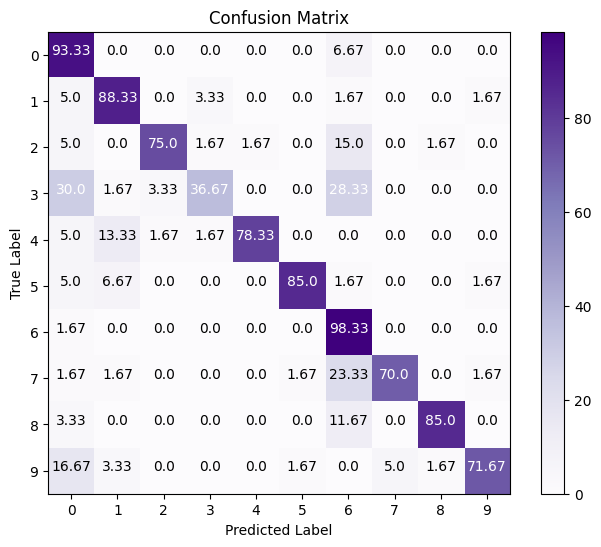

In [57]:
DS_train, data_test_x, data_test_y = make_dataset(all_features_digit, total_nums_digit, dataset_keys)
scratch_models = learning_from_scratch(DS_train, dataset_keys, 6)

preds = calc_predictions_scratch(scratch_models, data_test_x)
accuracy = calc_accuracy(data_test_y, preds)
precision = calc_precision(data_test_y, preds, len(dataset_keys))

conf_matrix = calc_confusion_matrix(data_test_y, preds, len(dataset_keys))

calc_metrics(data_test_y, preds, dataset_keys, "Digit", "From Scratch")
plot_confusion_matrix(conf_matrix, range(0, 10))

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_25060\2340396622.py:25: RuntimeWarning: invalid value encountered in divide
  alpha[:, t] /= alpha_sum
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_25060\2340396622.py:26: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(alpha_sum)


Speaker Model From Scratch Metrics:
	Accuracy: 0.7233
	Precision: 0.7984


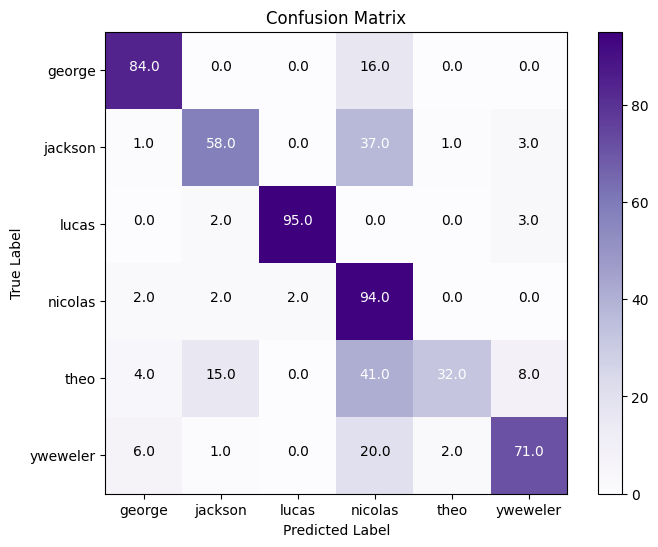

In [58]:
DS_train, data_test_x, data_test_y = make_dataset(all_features_speaker, total_nums_speaker, audio_speakers)
scratch_models = learning_from_scratch(DS_train, audio_speakers, 9)

preds = calc_predictions_scratch(scratch_models, data_test_x)

accuracy = calc_accuracy(data_test_y, preds)
precision = calc_precision(data_test_y, preds, len(audio_speakers))

conf_matrix = calc_confusion_matrix(data_test_y, preds, len(audio_speakers))

calc_metrics(data_test_y, preds, audio_speakers, "Speaker", "From Scratch")
plot_confusion_matrix(conf_matrix, audio_speakers)

### Performance Comparison: hmmlearn Library vs. Custom HMM Class

#### Advantages of hmmlearn Library

- **Advanced Parameter Initialization**: hmmlearn may employ advanced algorithms like Baum-Welch for initializing parameters, enhancing model convergence and performance.
- **Optimized Training Algorithms**: It likely uses finely-tuned algorithms such as Expectation-Maximization or Viterbi for training, ensuring high efficiency and stability.
- **Enhanced Numerical Stability**: The library might include features to maintain numerical stability, avoiding common issues like underflow or overflow in probability computations.
- **Robust Implementation**: With thorough testing and optimization, hmmlearn's handling of various scenarios, including edge cases and boundary conditions, contributes to its robust performance.

#### Limitations of Custom HMM Class

- **Simpler Initialization**: Manual parameter initialization in custom classes might not be as effective, potentially leading to less optimal models.
- **Algorithmic Efficiency**: Custom implementations may not match the performance of the sophisticated algorithms used by hmmlearn.
- **Numerical Instability Risks**: Without the same level of stability enhancements, custom classes might be more prone to numerical errors.
- **Implementation Nuances**: Minor differences in implementation can significantly affect performance, and custom classes may not have undergone the same level of rigorous testing as hmmlearn.

## Question 1:
### ``Accuracy``
Accuracy quantifies the ratio of correct predictions to the total predictions made by a classification model. It's calculated as:
$$ \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Predictions}} $$
While straightforward, accuracy may not always be the best standalone metric, especially for imbalanced datasets. In such cases, other metrics like precision, recall, F1 score, or ROC and precision-recall curves might be more indicative of a model's performance.

### ``Precision``
Precision measures the proportion of actual positives among positive predictions, essential for models where false positives are costly. It's defined as:
$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$
It's a critical metric when the cost of a false positive is high and should be used in conjunction with other metrics for a fuller performance picture.

### ``Recall``
Also known as sensitivity, recall assesses a model's ability to identify all actual positives. It's expressed as:
$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$
Recall is vital in scenarios where missing a positive is more detrimental than a false positive, and it's often balanced with precision.

### ``F1 Score``
The F1 score harmonizes precision and recall into a single metric, useful for uneven class distributions or when the costs of false positives and negatives differ. It's given by:
$$ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$
This score provides a single measure to evaluate a binary classifier's accuracy, considering both false positives and negatives.

## Question 2:
- 1. Confusion Matrix Approach
A confusion matrix offers a comprehensive view of classification performance by detailing correct and incorrect predictions for each class. Derived metrics include class-specific accuracy, precision, recall, and F1 score.

- 2. One-vs-All (OvA) Method
This technique isolates each class as a unique positive class against all others combined as the negative class. Individual class metrics are computed and then amalgamated using various averaging strategies.

- 3. Averaging Techniques
Different averaging methods like Macro, Micro, and Weighted averaging provide flexibility in aggregating individual class metrics to reflect overall model performance.

Employing these methodologies allows for thorough evaluation of multi-class classifiers, shedding light on their effectiveness across diverse classes.

## Question 3:
- 1. Accuracy:
This metric reflects the fraction of correct predictions made by a model out of all predictions. While useful for a quick assessment, accuracy can be deceptive for imbalanced datasets where a prevalent class dominates the predictions.

- 2. Precision:
Precision measures the accuracy of the model's positive class predictions, indicating the proportion of true positives among all positive predictions. A model with high precision is characterized by a low rate of false positives.

- 3. Recall:
Recall, or sensitivity, gauges the model's effectiveness in identifying all instances of the positive class. It's the ratio of true positives to the sum of true positives and false negatives. A high recall value signifies that the model captures the majority of positive instances.

- 4. F1 Score:
The F1 score harmonizes precision and recall into a singular metric, representing their harmonic mean. It's an important measure when precision and recall are equally critical, and it's especially relevant when the costs associated with false positives and false negatives are different.

## Question 4:
##### Precision
Precision is the fraction of true positive predictions out of all positive predictions made by a model. It's a measure of a model's accuracy in predicting positive instances and is defined as:
$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$
A model with high precision makes relatively few false positive predictions, indicating a reliable positive prediction capability.

##### Recall
Recall, or the true positive rate, is the fraction of true positive predictions out of all actual positive instances. It measures a model's completeness in capturing positive instances and is defined as:
$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$
A high recall score means the model identifies the majority of positive instances, minimizing missed positive predictions.

Relying solely on precision or recall may not provide a full picture of a model's performance. For instance:
- **High Precision, Low Recall Scenario**: A spam filter with high precision but low recall accurately identifies spam emails but fails to catch many, allowing spam to reach the inbox.
- **High Recall, Low Precision Scenario**: A medical test with high recall but low precision correctly identifies most disease cases but also produces many false alarms, leading to unnecessary further testing.

Balancing precision and recall is crucial for a well-rounded evaluation of a model's performance, especially when false positives and false negatives carry different consequences.

## Question 5:
The ``F1 score`` uses harmonic mean averaging method. Unlike normal averaging methods, the harmonic mean gives more weight to lower values. This ensures that the F1 score penalizes models with large disparities between precision and recall, providing a balanced evaluation of the model's performance. By capturing the balance between precision and recall, the F1 score offers a single metric that reflects the model's effectiveness across various scenarios, making it valuable in model evaluation.

## Questions 6, 7 & 8:
### Model Training Evaluation

#### Target Variable: `digitLabel`

The model's performance on digit classification is commendable, with accuracy and precision surpassing 90% for the library-based approach and 80% when implemented from scratch. This indicates a robust ability to categorize test data effectively.

Previously, we've delineated the distinctions between metrics derived from library implementations versus those developed from scratch.

Repeated trials throughout the project revealed that digit '3' posed the greatest challenge in labeling, often yielding lower accuracy and precision compared to other digits, particularly in the from-scratch model. Conversely, digits '0' and '9' consistently demonstrated superior performance.

#### Target Variable: `speaker`

Similarly, the speaker-based model exhibits strong accuracy and precision, with figures above 90% for the library-based model and 80% for the from-scratch model, underscoring its reliable test data classification capabilities.

However, 'nicolas' proved to be the most problematic speaker to identify, likely due to vocal similarities with 'george' or 'lucas,' leading to frequent mislabeling. This issue was especially pronounced in the from-scratch model. In contrast, models for 'george' and 'lucas' generally performed well.

#### Comparison of Target Variables

Across numerous evaluations, the choice of target variable—`digitLabel` or `speaker`—appeared to have minimal impact on the results, with both yielding closely aligned outcomes. Nevertheless, an intuitive assessment suggests a slight edge in overall results for the `digitLabel` target. This is further supported by the observation that, in most instances, the `digitLabel` target achieved higher precision than the `speaker` target in both library-based and from-scratch models.

The minor variability in results, often within a 2-3% range, could be attributed to the inherent randomness within the models. Given the negligible differences, it can be inferred that our models perform comparably well, regardless of the chosen target.
